# Energy profile vs. beam intensity

To do: check whether the mean x and y on the BPM is the same at each intensity.

In [1]:
import sys
import os
from os.path import join
from collections import Counter
from datetime import datetime
import h5py
import numpy as np
from tqdm import trange
from scipy import optimize as opt
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm
import proplot as pplt

sys.path.append('..')
from tools import image_processing as ip
from tools import plotting as mplt
from tools import utils
from tools.energyVS06 import EnergyCalculate

pplt.rc['grid'] = False
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'dusk_r'

In [4]:
folder = '/home/share/Measurements/2022-04-27/'
filenames = os.listdir(folder)
filenames

['220427143259-image_on_demand.h5',
 '220427152517-x2d-slit.h5',
 '220427151929-y1d-vs06.h5',
 '220427151311-y1d-vs06.h5',
 '220427155227-x2d-slit.h5',
 '220427163645-x2d-slit.h5',
 '220427170354-x2d-slit.h5',
 '220427172731-x2d-slit.h5',
 '220427172244-x2d-slit.h5']

In [5]:
filename = '220427143259-image_on_demand.h5'
file = h5py.File(join(folder, filename), 'r')
list(file.keys())

['config', 'log', 'scandata']

In [6]:
# Errors and warnings from log
for i in range(file['log'].size):
    if not(file['/log'][i, 'level'] == 'INFO'.encode('utf')):
        timestr = datetime.fromtimestamp(file['/log'][0, 'timestamp']).strftime("%m/%d/%Y, %H:%M:%S")
        print(f"{timestr} {file['log'][i, 'message']}")

# Configuration data
for key in file['/config'].keys():
    print(f"{key}")
    print("--------------")
    for name in file['/config'][key].dtype.names:
        print(f"{name}: {file['config'][key][name]}")
    print()

04/27/2022, 14:33:15 b'Ctrl-C pressed, will exit after current iteration is complete. Press Ctrl-C again to exit immediately.'
environment
--------------
timestamp: [1.65108438e+09]
user: [b'46h']
host: [b'btf-diag-app1.ics.sns.gov']
cmd_line: [b'misc/image_on_demand.py']
work_dir: [b'/home/46h/se-template']

metadata
--------------
timestamp: [1.6510844e+09]
Test_LLRF:FCM_RFQ1:CtlAmpSet: [0.63]
RFTF_TM:Gate_BeamOn:RR: [2.]
BTF_MEBT_Mag:PS_QH01:I_Set: [157.94]
BTF_MEBT_Mag:PS_QV02:I_Set: [280.06]
BTF_MEBT_Mag:PS_QH03:I_Set: [6.75]
BTF_MEBT_Mag:PS_QV04:I_Set: [-3.75]
BTF_MEBT_Mag:PS_QH05:I_Set: [0.]
BTF_MEBT_Mag:PS_QV06:I_Set: [-0.]
BTF_MEBT_Mag:PS_QV07:I_Set: [-3.1]
BTF_MEBT_Mag:PS_QH08:I_Set: [4.1]
BTF_MEBT_Mag:PS_QV09:I_Set: [-1.85000002]
BTF_MEBT_Mag:PS_QV10:I_Set: [-1.9]
BTF_MEBT_Mag:PS_QH11:I_Set: [7.2]
BTF_MEBT_Mag:PS_QV12:I_Set: [-6.55000019]
BTF_MEBT_Mag:PS_QH13:I_Set: [6.00035858]
BTF_MEBT_Mag:PS_QH33:I_Set: [5.0999999]
BTF_MEBT_Mag:PS_QV34:I_Set: [-5.30000019]
BTF_MEBT_Mag:PS

In [7]:
data = file['scandata']
print('Data:')
for i, name in enumerate(data.dtype.names):
    print(f'{name} [{data.dtype[i]}]')
print()

slits = [key for key in data.dtype.names if 'PositionSync' in key]
print('slits:')
for slit in slits:
    print(slit)

Data:
timestamp [float64]
iteration [int64]
bcm [float64]
cam06_Image [('<i4', (313344,))]
cam06_ProfileX [('<f4', (612,))]
cam06_Saturation [float64]
ITSF_Diag:Slit_VT04:PositionSync [float64]
ITSF_Diag:Slit_VT06:PositionSync [float64]
ITSF_Diag:Slit_HZ06:PositionSync [float64]
bpm04_x [('<f8', (1200,))]
bpm04_y [('<f8', (1200,))]
bpm04_magu [('<f4', (1200,))]
bpm04_magd [('<f4', (1200,))]
bpm04_magl [('<f4', (1200,))]
bpm04_magr [('<f4', (1200,))]
cam06_exp [int32]
focus2 [float64]
focus1 [float64]
x_PositionSync [float64]

slits:
ITSF_Diag:Slit_VT04:PositionSync
ITSF_Diag:Slit_VT06:PositionSync
ITSF_Diag:Slit_HZ06:PositionSync
x_PositionSync


SubplotGrid(nrows=1, ncols=1, length=1)

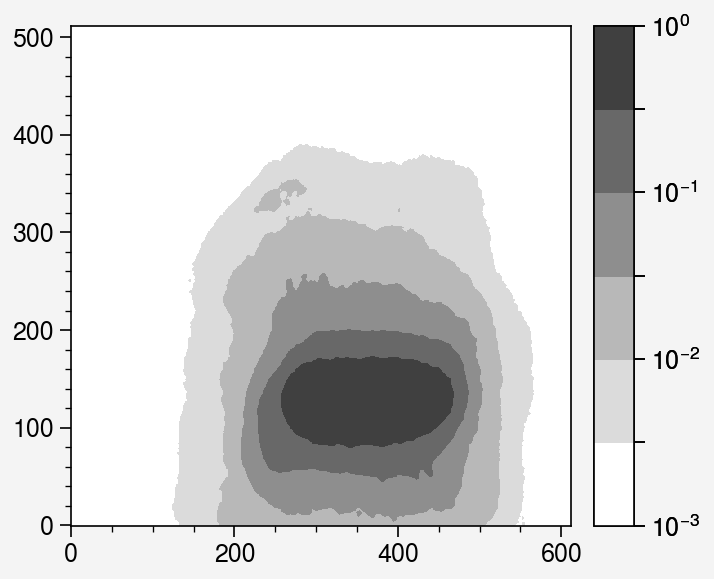

In [199]:
fig, ax = pplt.subplots()
mplt.plot_image(images[10].T / np.max(images[-1]), ax=ax, norm='log', colorbar=True, discrete=True,
                cmap=pplt.Colormap('grays', right=0.8), 
                vmax=1.0, vmin=1e-3,
               )

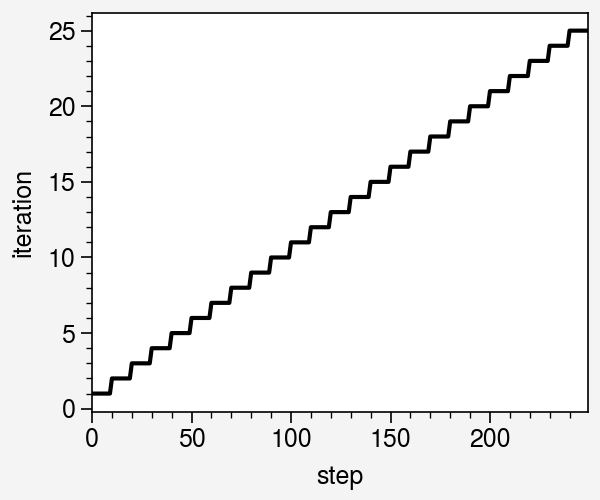

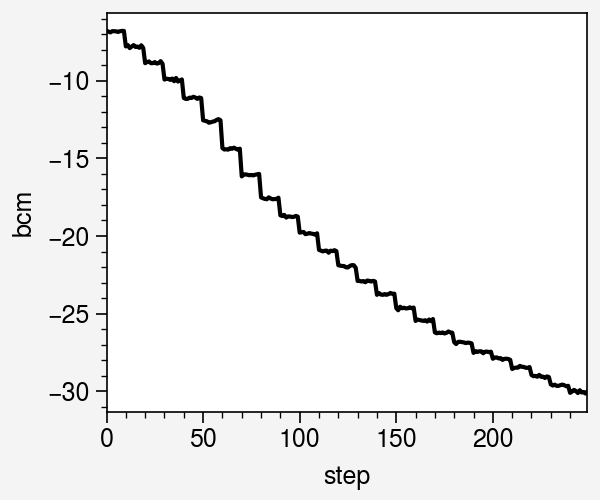

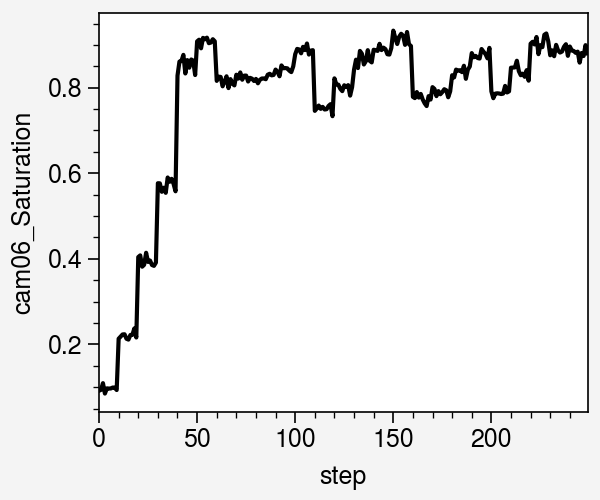

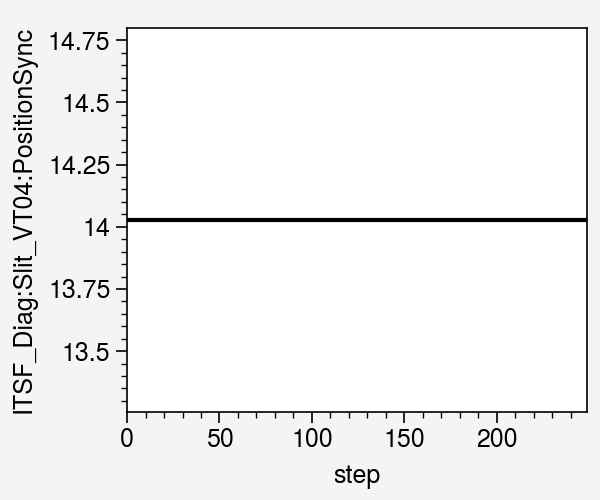

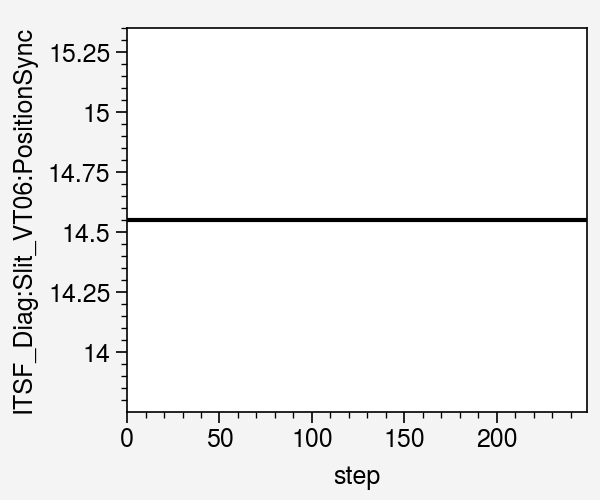

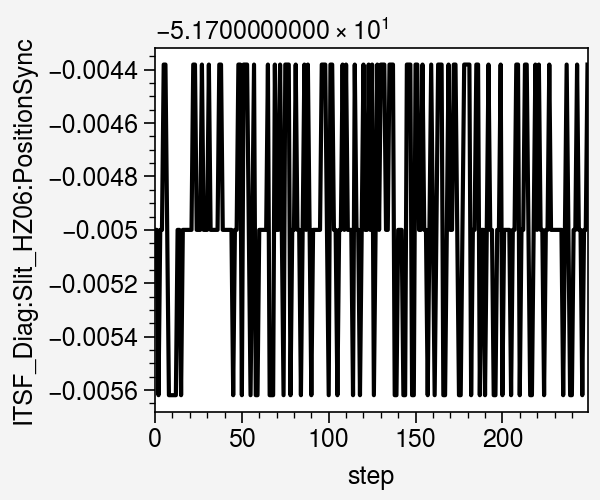

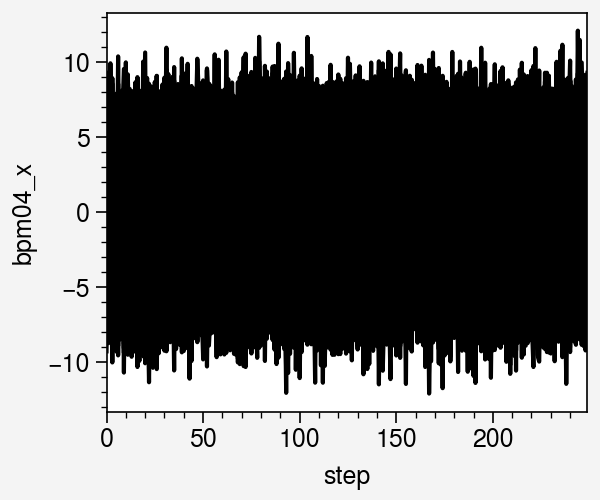

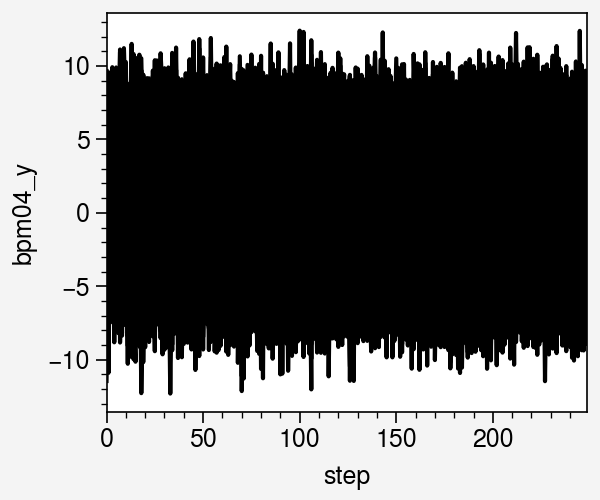

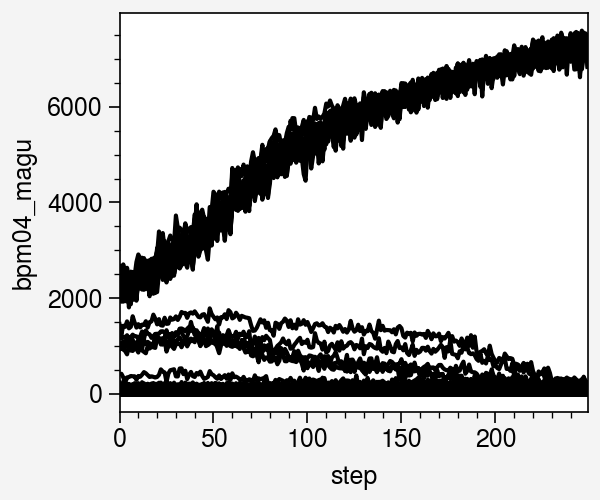

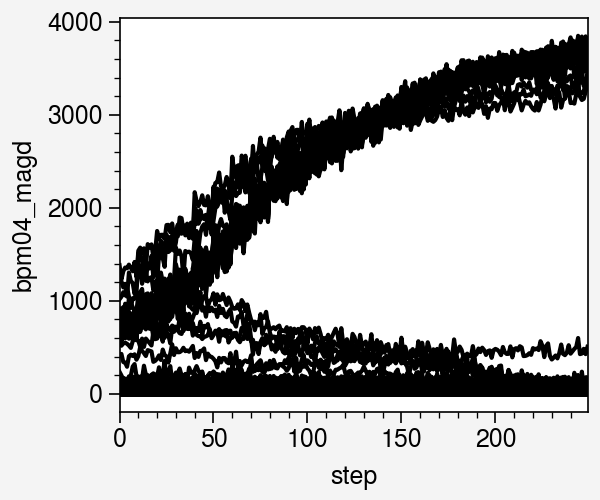

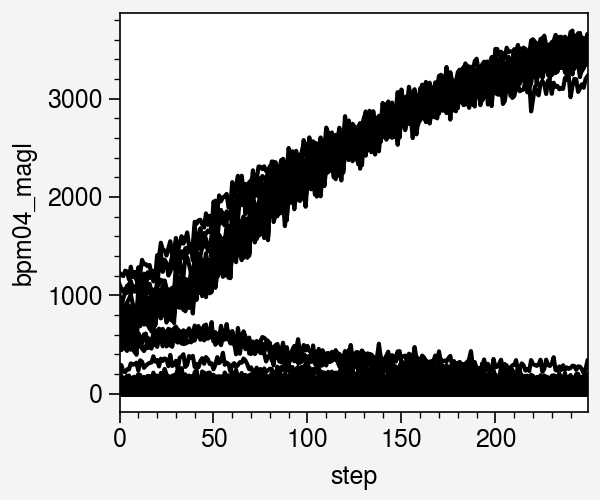

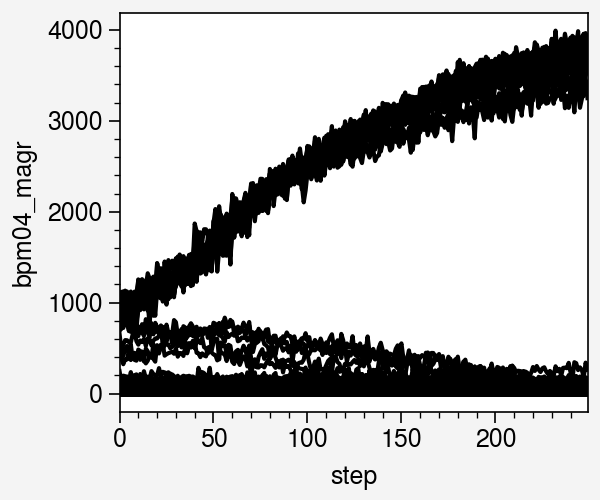

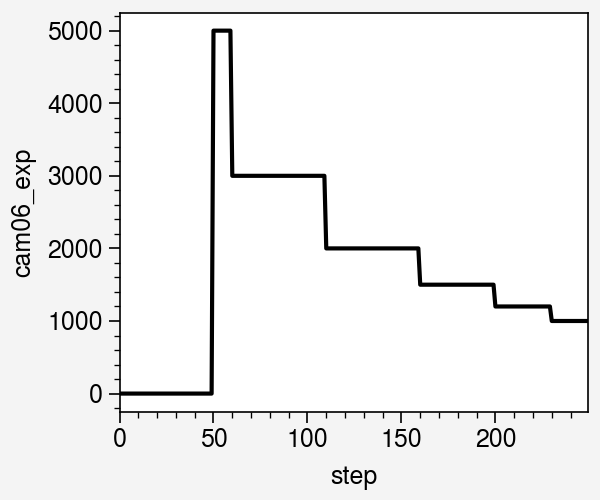

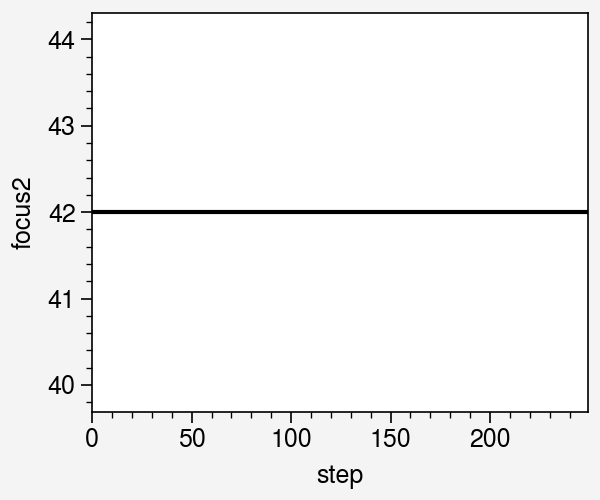

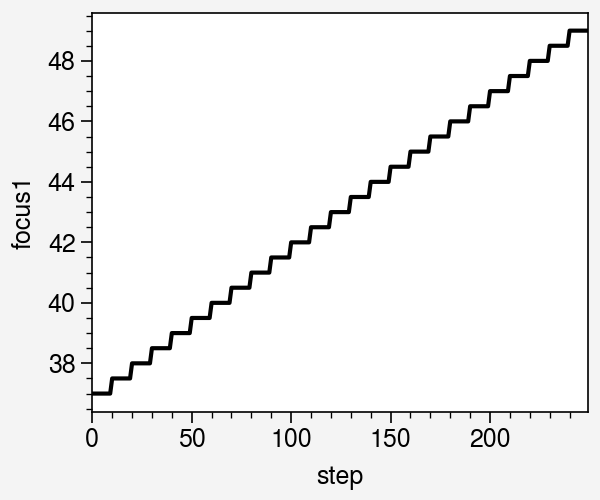

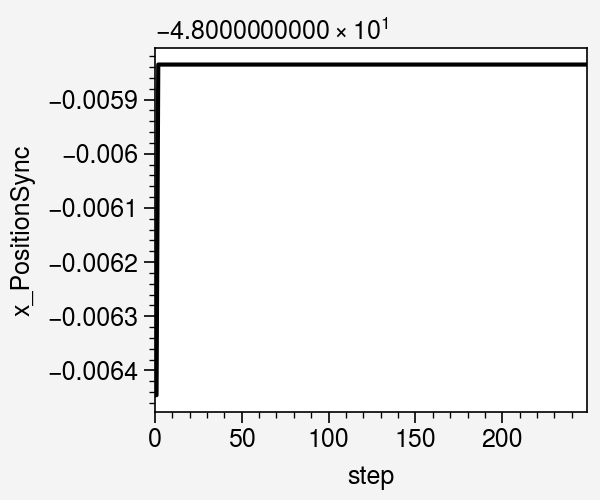

In [8]:
for name in data.dtype.names:
    if name in ['timestamp', 'cam06_Image', 'cam06_ProfileX']:
        continue
    fig, ax = pplt.subplots(figsize=(3.0, 2.5))
    ax.plot(data[name], color='black')
    ax.format(xlabel='step', ylabel=name)
    plt.show()

<a list of 1 Line2D objects>

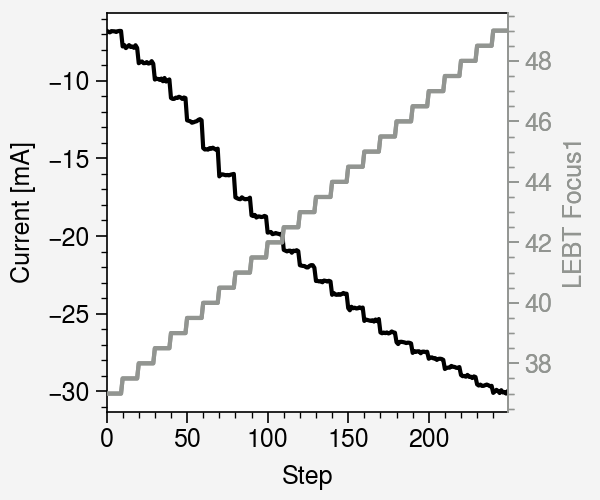

In [10]:
fig, ax = pplt.subplots(figsize=(3.0, 2.5))
ax.format(xlabel='Step', ylabel='Current [mA]')
ax2 = ax.alty(color='grey')
ax2.format(ylabel='LEBT Focus1')
ax2.plot(data['focus1'], color='grey')
ax.plot(data['bcm'], color='black')
# plt.savefig('_output/current')

In [11]:
bpm_wfs = dict()
bpm_means = dict()
bpm_stds = dict()
bpm_keys = ['x', 'y', 'u', 'd', 'l', 'r', 'xraw', 'yraw']
for key in bpm_keys:
    bpm_wfs[key] = []
    bpm_means[key] = []
    bpm_stds[key] = []

In [142]:
iterations = []
profiles = []
currents = []
images = []
lo, hi = 566, 595
for iteration in trange(1, max(data['iteration']) + 1):
    iterations.append(iteration)
    idx = data['iteration'] == iteration
    image = np.mean(data['cam06_Image'][idx, :], axis=0).reshape((512, 612))
    
    # image = skimage.transform.downscale_local_mean(image, 4)
    image = ndimage.gaussian_filter(image, 1.0)
    
    images.append(image)
    profile = np.sum(image, axis=0)
    # profile = np.mean(data['cam06_ProfileX'][idx, :], axis=0)  # averagine
    profile = profile / np.sum(profile)  # normalize
    profiles.append(profile)
    
    currents.append(data['bcm'][idx][0])
    
    
    # # BPM waveforms
    # cut = 999  # some waveforms are zero beyond this index
    # bpm_wf = dict()
    # bpm_wf['x'] = np.mean(data['bpm04_x'][idx, :cut], axis=0)
    # bpm_wf['y'] = np.mean(data['bpm04_y'][idx, :cut], axis=0)
    # bpm_wf['u'] = np.mean(data['bpm04_magu'][idx, :cut], axis=0)
    # bpm_wf['d'] = np.mean(data['bpm04_magd'][idx, :cut], axis=0)
    # bpm_wf['l'] = np.mean(data['bpm04_magl'][idx, :cut], axis=0)
    # bpm_wf['r'] = np.mean(data['bpm04_magr'][idx, :cut], axis=0)
    # bpm_wf['xraw'] = 8.0 * np.log10(bpm_wf['l'] / bpm_wf['r'])
    # bpm_wf['yraw'] = 8.0 * np.log10(bpm_wf['u'] / bpm_wf['d'])
    # for key, wf in bpm_wf.items():
    #     window = wf[lo:hi]
    #     bpm_means[key].append(np.mean(window))
    #     bpm_stds[key].append(np.std(window))
    #     bpm_wfs[key].append(wf)

100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


In [108]:
profiles = np.array(profiles)
currents = np.array(currents)
# for key in bpm_wfs:
#     bpm_wfs[key] = np.array(bpm_wfs[key])
#     bpm_means[key] = np.array(bpm_means[key])
#     bpm_stds[key] = np.array(bpm_stds[key])

In [14]:
pad = 25
_lo = lo - pad
_hi = hi + pad
xx = np.arange(lo - pad, hi + pad)

## This will make a lot of plots.
# for i in range(len(profiles)):
#     fig, axes = pplt.subplots(ncols=8, figheight=1.5, sharey=False)
#     plot_kws = dict(color='black')
#     for ax, key in zip(axes, bpm_keys):
#         ax.plot(xx, bpm_wfs[key][i, _lo:_hi], **plot_kws)
#         ax.set_title(key)
#         ax.axvspan(lo, hi, color='black', alpha=0.05)
#     plt.show()

In [15]:
# cmap = pplt.Colormap('greys', left=0.12, right=0.9)
# cmap = pplt.Colormap('mono', left=0.05, right=0.9)
cmap = pplt.Colormap('flare')
norm = colors.Normalize(np.min(np.abs(currents)), np.max(np.abs(currents)))
mappable = cm.ScalarMappable(norm, cmap)

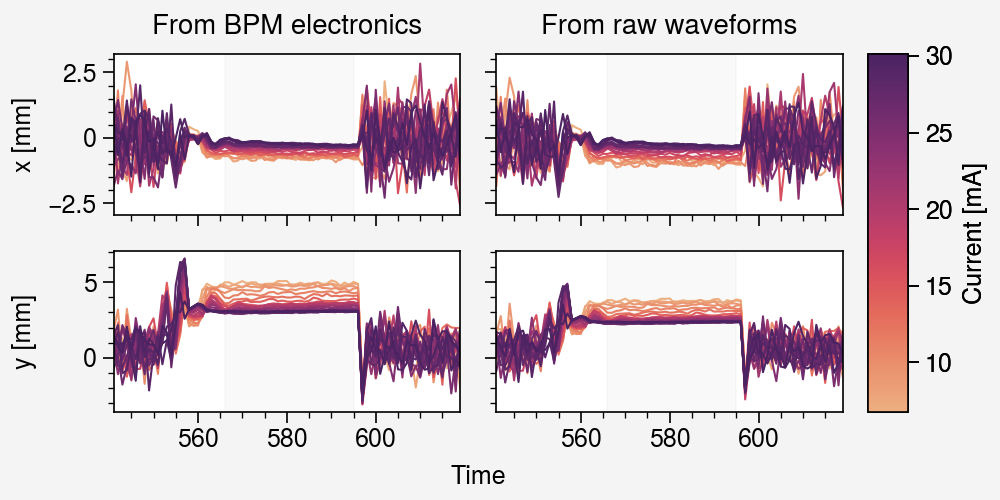

In [16]:
fig, axes = pplt.subplots(ncols=2, nrows=2, figsize=(5, 2.5), spany=False, aligny=True)
plot_kws = dict(lw=0.75)
for i in range(len(profiles)):
    color = mappable.to_rgba(np.abs(currents[i]))
    axes[0, 0].plot(xx, bpm_wfs['x'][i, _lo:_hi].T, color=color, **plot_kws)
    axes[1, 0].plot(xx, bpm_wfs['y'][i, _lo:_hi].T, color=color, **plot_kws)
    axes[0, 1].plot(xx, bpm_wfs['xraw'][i, _lo:_hi].T, color=color, **plot_kws)
    axes[1, 1].plot(xx, bpm_wfs['yraw'][i, _lo:_hi].T, color=color, **plot_kws)
for ax in axes:
    ax.axvspan(lo, hi, color='black', alpha=0.025)
fig.colorbar(mappable, label='Current [mA]')
axes[0, :].format(ylabel='x [mm]')
axes[1, :].format(ylabel='y [mm]')
axes.format(
    xlabel='Time', 
    toplabels=['From BPM electronics', 'From raw waveforms'], 
    toplabels_kw=dict(fontweight='normal'),
)
# plt.savefig('_output/bpm')

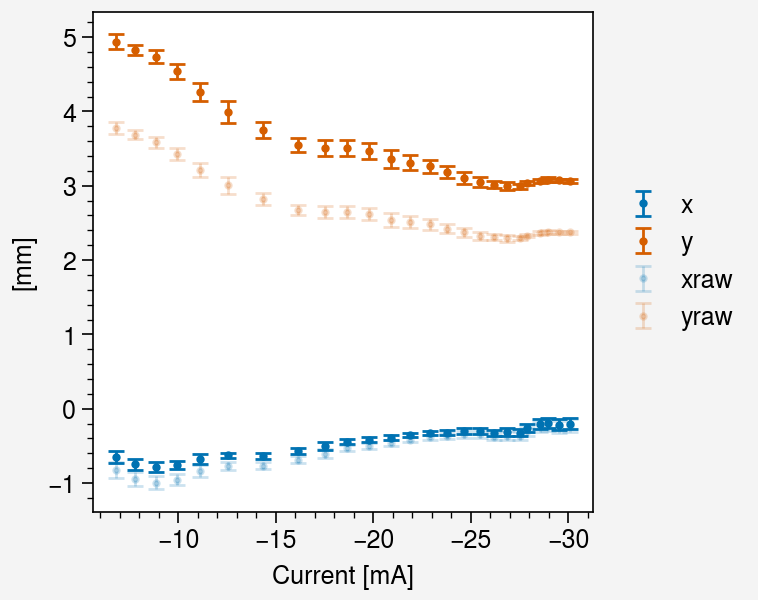

In [17]:
fig, ax = pplt.subplots()
plot_kws = dict(marker='.', ms=4.0, lw=0, elinewidth=1.0)
for key in ['x', 'y']:
    ax.errorbar(currents, bpm_means[key], yerr=bpm_stds[key], label=key, **plot_kws)
ax.format(cycle='colorblind')
plot_kws['alpha'] = 0.2
for key in ['xraw', 'yraw']:
    ax.errorbar(currents, bpm_means[key], yerr=bpm_stds[key], label=key, **plot_kws)
ax.format(xlabel='Current [mA]', ylabel='[mm]')
ax.legend(loc='right', ncols=1, framealpha=0.)
# plt.savefig('_output/bpmavg')
plt.show()

## Energy conversion

In [20]:
dipole_current = 0.0  # deviation of dipole current from nominal
l = 0.129  # dipole face to screen (assume same for first/last dipole-screen)
GL05 = 0.0  # QH05 integrated field strength (1 [A] = 0.0778 [Tm])
GL06 = 0.0  # QH06 integrated field strength (1 [A] = 0.0778 [Tm])
l1 = 0.280  # slit1 to QH05 center
l2 = 0.210  # QH05 center to QV06 center
l3 = 0.457  # QV06 center to slit2
L2 = 0.599  # slit2 to dipole face    
rho_sign = +1.0  # dipole bend radius sign
if GL05 == 0.0 and file['config']['metadata']['BTF_MEBT_Mag:PS_QH05:I_Set'] != 0.0:
    print('Warning: QH05 is turned on according to metadata.')
if GL05 != 0.0 and file['config']['metadata']['BTF_MEBT_Mag:PS_QH05:I_Set'] == 0.0:
    print('Warning: QH05 is turned off according to metadata.')
if GL06 == 0.0 and file['config']['metadata']['BTF_MEBT_Mag:PS_QV06:I_Set'] != 0.0:
    print('Warning: QH06 is turned on according to metadata.')
if GL06 != 0.0 and file['config']['metadata']['BTF_MEBT_Mag:PS_QV06:I_Set'] == 0.0:
    print('Warning: QH06 is turned off according to metadata.')
LL = l1 + l2 + l3 + L2  # distance from emittance plane to dipole entrance
ecalc = EnergyCalculate(l1=l1, l2=l2, l3=l3, L2=L2, l=l, rho_sign=rho_sign)
Mslit = ecalc.getM1(GL05=GL05, GL06=GL06)  # slit-slit
Mscreen = ecalc.getM(GL05=GL05, GL06=GL06)  # slit-screen

In [21]:
camera_settings = ip.CameraSettings('Cam06')

zoom = [0.25, 0.33, 0.5, 1.0][int(file['config']['metadata']['ITSF_Diag:Cam06:Magn'])]
camera_settings.set_zoom(zoom)

print(f"pix2mm = {camera_settings.pix2mm} (for zoom = {zoom})")
print('zoom =', zoom)

pix2mm = 0.027 (for zoom = 1.0)
zoom = 1.0


Convert x3 coordinates of each profile to energy spread at slit VT04.

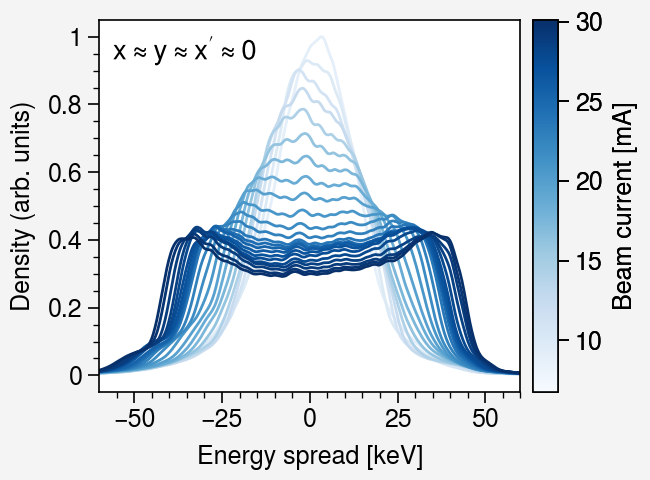

In [201]:
# cmap = pplt.Colormap('mono', left=0.05, right=0.9)
# cmap = pplt.Colormap('grays', left=0.1, right=0.9)
cmap = pplt.Colormap('blues', left=0.0)
norm = colors.Normalize(np.min(np.abs(currents)), np.max(np.abs(currents)))
mappable = cm.ScalarMappable(norm, cmap)

x3grid = camera_settings.pix2mm * np.arange(images[0].shape[1])
x = xp = 0.0

fig, ax = pplt.subplots(figsize=(3.25, 2.4))
count = 0
istart = 2
pmax = np.max(profiles[istart:])
for profile, current in zip(profiles[istart:], currents[istart:]):
    x3avg = np.average(x3grid, weights=profile)
    w = ecalc.calculate_dE_screen((x3grid - x3avg) * 1e-3, dipole_current, x, xp, Mscreen)  # [MeV]
    _profile = profile.copy()
    _profile = _profile / pmax
    
    from scipy import ndimage
    xvals = w * 1.0e3
    yvals = _profile + count * 0.0
    ax.plot(
        xvals, yvals,
        color=mappable.to_rgba(np.abs(current)), 
        lw=1.0
    )
    count += 1
ax.colorbar(mappable=mappable, label='Beam current [mA]', width=0.125)
ax.format(xlabel='Energy spread [keV]',
          xlim=(-60.0, 60.0), 
          ylabel='Density (arb. units)')
ax.format(upperlefttitle=r"$x \approx y \approx x' \approx 0$")
plt.savefig('_output/w_vs_current_slice_xxpy')
plt.show()

In [ ]:
from scipy import interpolate

wgrid = np.linspace(-0.2, 0.2, 100)
_profiles = np.zeros((len(currents), len(wgrid)))
for i, (profile, current) in zip(profiles[:], currents[:]):
    x3avg = np.average(x3grid, weights=profile)
    w = ecalc.calculate_dE_screen((x3grid - x3avg) * 1e-3, dipole_current, x, xp, Mscreen)  # [MeV]
    _profile = profile / np.max(profile)
    ax.
ax.colorbar(mappable=mappable, label='Current [mA]', width=0.125)
ax.format(yticks=[], xlabel='Energy spread [MeV]', ylabel='Density', 
          xlim=(-0.15, 0.15))
# plt.savefig('_output/hollow')

In [ ]:
_profiles = profiles.copy()
for i in range(len(_profiles)):
    _profiles[i] = _profiles[i] / np.max(_profiles[i])

fig, ax = pplt.subplots(figsize=(5.0, 2.0))
ax.pcolormesh(
    np.arange(profiles.shape[1]),
    currents, 
    _profiles, 
    cmap='crest_r', colorbar=True, colorbar_kw=dict(),
)
ax.format(ylabel='Current [mA]', xlabel=r'~$\Delta$E')
# plt.savefig('waterfall_heatmap')
plt.show()

In [ ]:
fig, axes = pplt.subplots(nrows=4, ncols=5, figwidth=5.0, space=0.5)
for ax in axes[-2:]:
    ax.axis('off')
for image, ax, current in zip(images[1:], axes, currents):
    ax.imshow(image[:-200, 100:], cmap='dusk_r')
    ax.annotate(f'I = {current:.2f}', xy=(0.01, 0.01), xycoords='axes fraction',
                color='white', fontsize='small',
                verticalalignment='bottom', horizontalalignment='left')
axes.format(xticks=[], yticks=[])
# plt.savefig('_output/images')
plt.show()

In [ ]:
# import gif
# gif.options.matplotlib["dpi"] = 200

# @gif.frame
# def plot(i):
#     fig, ax = plt.subplots(figsize=(3.0, 3.0))
#     ax.imshow(images[i], cmap=pplt.Colormap('mono_r', left=0.04))
#     ax.annotate(f'I = {currents[i]:.2f} [mA]', xy=(0.01, 0.01), xycoords='axes fraction',
#                 color='white', fontsize='small',
#                 verticalalignment='bottom', horizontalalignment='left')
#     ax.set_xticks([])
#     ax.set_yticks([])
#     plt.savefig(f'_output/folder/image{i}.png')

# frames = [plot(i) for i in range(len(images))]
# gif.save(frames, '_output/images.gif', duration=0.25, unit="s", between="frames")